In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import splat
import splat.database as spdb
import splat.plot as splot
import splat.photometry as sphot
import splat.empirical as spem
import seaborn as sns
import warnings
import copy
import astropy.units as u
import scipy.stats
from tqdm import tqdm
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.coordinates import Angle, Distance
from astroquery.vizier import Vizier
from astropy.time import Time


Adding 2404 sources from C:\Users\ZIJIE\Documents\GitHub\splat/resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 89 sources from C:\Users\ZIJIE\Documents\GitHub\splat/resources/Spectra/Public/MAGE/ to spectral database
Adding 145 sources from C:\Users\ZIJIE\Documents\GitHub\splat/resources/Spectra/Public/LRIS-RED/ to spectral database
Could not import regions, which is required for some of the functionalities of this module.


In [2]:
import splat.empirical as spem

In [3]:
Vizier.ROW_LIMIT = -1
result1 = Vizier.query_region(SkyCoord(ra=150, dec=5,
                                             unit=(u.deg, u.deg),
                                             frame='icrs'),
                         radius=Angle(2, "deg"),
                         column_filters={"Jmag1":">13"and "<17.5"},
                         catalog=["SDSS DR12"])

In [8]:
Non_UCD_SDSS=result1[0].to_pandas()
Non_UCD_SDSS

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,RA_ICRS,DE_ICRS,ObsDate,Q
0,1,6,J095851.24+050100.4,,NaN,17.020000,0.008,15.833000,0.003,15.446000,0.004,15.318000,0.004,15.270000,0.005,149.713516,5.016791,2001.1396,3
1,2,6,J095851.24+050100.4,*,NaN,17.004000,0.007,15.842000,0.004,15.469000,0.004,15.315000,0.004,15.293000,0.005,149.713519,5.016797,2002.1199,3
2,1,3,J095851.25+050433.1,,NaN,24.528000,1.201,23.629000,0.374,22.987000,0.275,22.122999,0.200,21.843000,0.519,149.713579,5.075882,2001.1396,3
3,2,6,J095851.26+050433.3,,NaN,24.601999,0.997,24.829000,0.626,22.627001,0.159,22.851999,0.287,21.923000,0.325,149.713613,5.075929,2002.1199,3
4,1,3,J095851.27+045730.5,,NaN,25.261000,2.412,24.135000,1.237,21.728001,0.223,21.820999,0.375,24.104000,0.965,149.713654,4.958492,2001.1396,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428992,1,6,J100621.89+034659.7,,NaN,24.420000,1.171,21.469000,0.082,21.284000,0.077,19.552000,0.025,22.552000,0.658,151.591237,3.783263,2001.1396,3
428993,1,3,J100622.02+034710.4,,NaN,11.224000,0.001,9.921000,0.001,9.697000,0.001,12.468000,0.007,10.190000,0.001,151.591763,3.786221,2001.1396,3
428994,1,6,J100622.17+034719.9,,NaN,24.591999,1.276,21.981001,0.137,24.789000,0.979,20.145000,0.043,22.822001,0.673,151.592376,3.788867,2001.1396,3
428995,2,6,J095628.95+031217.1,,NaN,24.604000,1.289,26.049999,0.459,25.031000,0.798,24.113001,1.005,20.569000,0.227,149.120651,3.204754,2000.9157,2


In [9]:
print(list(Non_UCD_SDSS.columns))

['mode', 'cl', 'SDSS', 'm_SDSS', 'zsp', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'RA_ICRS', 'DE_ICRS', 'ObsDate', 'Q']


In [10]:
Non_UCD_SDSS.rename(columns={'RA_ICRS': 'RA','DE_ICRS': 'DEC'},inplace=True)
Non_UCD_SDSS

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,RA,DEC,ObsDate,Q
0,1,6,J095851.24+050100.4,,NaN,17.020000,0.008,15.833000,0.003,15.446000,0.004,15.318000,0.004,15.270000,0.005,149.713516,5.016791,2001.1396,3
1,2,6,J095851.24+050100.4,*,NaN,17.004000,0.007,15.842000,0.004,15.469000,0.004,15.315000,0.004,15.293000,0.005,149.713519,5.016797,2002.1199,3
2,1,3,J095851.25+050433.1,,NaN,24.528000,1.201,23.629000,0.374,22.987000,0.275,22.122999,0.200,21.843000,0.519,149.713579,5.075882,2001.1396,3
3,2,6,J095851.26+050433.3,,NaN,24.601999,0.997,24.829000,0.626,22.627001,0.159,22.851999,0.287,21.923000,0.325,149.713613,5.075929,2002.1199,3
4,1,3,J095851.27+045730.5,,NaN,25.261000,2.412,24.135000,1.237,21.728001,0.223,21.820999,0.375,24.104000,0.965,149.713654,4.958492,2001.1396,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428992,1,6,J100621.89+034659.7,,NaN,24.420000,1.171,21.469000,0.082,21.284000,0.077,19.552000,0.025,22.552000,0.658,151.591237,3.783263,2001.1396,3
428993,1,3,J100622.02+034710.4,,NaN,11.224000,0.001,9.921000,0.001,9.697000,0.001,12.468000,0.007,10.190000,0.001,151.591763,3.786221,2001.1396,3
428994,1,6,J100622.17+034719.9,,NaN,24.591999,1.276,21.981001,0.137,24.789000,0.979,20.145000,0.043,22.822001,0.673,151.592376,3.788867,2001.1396,3
428995,2,6,J095628.95+031217.1,,NaN,24.604000,1.289,26.049999,0.459,25.031000,0.798,24.113001,1.005,20.569000,0.227,149.120651,3.204754,2000.9157,2


In [11]:
import copy
Non_UCD = copy.deepcopy(Non_UCD_SDSS)

for cat in ['UKIDSS-DR9','ALLWISE']:
    Non_UCD = spdb.queryXMatch(Non_UCD,catalog=cat,radius=20.*u.arcsec)

In [12]:
Non_UCD

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,...,ALLWISE_ID,ALLWISE_ccf,ALLWISE_ex,ALLWISE_var,ALLWISE_qph,ALLWISE_pmRA,ALLWISE_e_pmRA,ALLWISE_pmDE,ALLWISE_e_pmDE,ALLWISE_d2M
0,1,6,J095851.24+050100.4,,NaN,17.020000,0.008,15.833000,0.003,15.446000,...,1503104501351063264,0000,0.0,00nn,AAUU,0,117,0,127,0.222
1,2,6,J095851.24+050100.4,*,NaN,17.004000,0.007,15.842000,0.004,15.469000,...,1503104501351063264,0000,0.0,00nn,AAUU,0,117,0,127,0.222
2,1,3,J095851.25+050433.1,,NaN,24.528000,1.201,23.629000,0.374,22.987000,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
3,2,6,J095851.26+050433.3,,NaN,24.601999,0.997,24.829000,0.626,22.627001,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
4,1,3,J095851.27+045730.5,,NaN,25.261000,2.412,24.135000,1.237,21.728001,...,1503104501351039418,0000,0.0,110n,AAAU,28,37,-48,37,0.219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428992,1,6,J100621.89+034659.7,,NaN,24.420000,1.171,21.469000,0.082,21.284000,...,1518104501351008011,0000,0.0,000n,AAAB,25,40,-49,37,0.463
428993,1,3,J100622.02+034710.4,,NaN,11.224000,0.001,9.921000,0.001,9.697000,...,1518104501351008011,0000,0.0,000n,AAAB,25,40,-49,37,0.463
428994,1,6,J100622.17+034719.9,,NaN,24.591999,1.276,21.981001,0.137,24.789000,...,1518104501351008011,0000,0.0,000n,AAAB,25,40,-49,37,0.463
428995,2,6,J095628.95+031217.1,,NaN,24.604000,1.289,26.049999,0.459,25.031000,...,1497103001351039626,0000,0.0,01nn,AACU,116,201,118,222,NaN


In [13]:
Non_UCD.columns

Index(['mode', 'cl', 'SDSS', 'm_SDSS', 'zsp', 'umag', 'e_umag', 'gmag',
       'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'RA',
       'DEC', 'ObsDate', 'Q', 'DESIGNATION', 'COORDINATES', 'UKIDSS_angDist',
       'UKIDSS_JName', 'UKIDSS_ra', 'UKIDSS_dec', 'UKIDSS_yAperMag3',
       'UKIDSS_j_1AperMag3', 'UKIDSS_hAperMag3', 'UKIDSS_kAperMag3',
       'UKIDSS_yAperMag3Err', 'UKIDSS_j_1AperMag3Err', 'UKIDSS_hAperMag3Err',
       'UKIDSS_kAperMag3Err', 'UKIDSS_sourceID', 'UKIDSS_mode', 'UKIDSS_epoch',
       'UKIDSS_mergedClass', 'ALLWISE_angDist', 'ALLWISE_AllWISE',
       'ALLWISE_RAJ2000', 'ALLWISE_DEJ2000', 'ALLWISE_eeMaj', 'ALLWISE_eeMin',
       'ALLWISE_eePA', 'ALLWISE_W1mag', 'ALLWISE_W2mag', 'ALLWISE_W3mag',
       'ALLWISE_W4mag', 'ALLWISE_Jmag', 'ALLWISE_Hmag', 'ALLWISE_Kmag',
       'ALLWISE_e_W1mag', 'ALLWISE_e_W2mag', 'ALLWISE_e_W3mag',
       'ALLWISE_e_W4mag', 'ALLWISE_e_Jmag', 'ALLWISE_e_Hmag', 'ALLWISE_e_Kmag',
       'ALLWISE_ID', 'ALLWISE_ccf', 'ALL

In [14]:
#Eliminating the rows that don't have magnitudes

Non_UCD = Non_UCD[Non_UCD['imag'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['e_imag'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['zmag'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['e_zmag'].notna()==True]

Non_UCD = Non_UCD[Non_UCD['UKIDSS_yAperMag3'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_j_1AperMag3'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_hAperMag3'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_kAperMag3'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_yAperMag3Err'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_j_1AperMag3Err'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_hAperMag3Err'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_kAperMag3Err'].notna()==True]

Non_UCD = Non_UCD[Non_UCD['ALLWISE_W1mag'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['ALLWISE_e_W1mag'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['ALLWISE_W2mag'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['ALLWISE_e_W2mag'].notna()==True]

In [15]:
Non_UCD

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,...,ALLWISE_ID,ALLWISE_ccf,ALLWISE_ex,ALLWISE_var,ALLWISE_qph,ALLWISE_pmRA,ALLWISE_e_pmRA,ALLWISE_pmDE,ALLWISE_e_pmDE,ALLWISE_d2M
0,1,6,J095851.24+050100.4,,NaN,17.020000,0.008,15.833000,0.003,15.446000,...,1503104501351063264,0000,0.0,00nn,AAUU,0,117,0,127,0.222
1,2,6,J095851.24+050100.4,*,NaN,17.004000,0.007,15.842000,0.004,15.469000,...,1503104501351063264,0000,0.0,00nn,AAUU,0,117,0,127,0.222
8,1,3,J095851.37+051103.8,,NaN,24.455999,1.529,25.278000,1.148,22.260000,...,1503104501351063481,0000,0.0,1nnn,ABUU,-182,518,-946,565,NaN
10,1,6,J095851.37+051052.6,,NaN,25.169001,0.999,23.304001,0.297,22.548000,...,1503104501351063353,0000,0.0,00nn,AAUU,-183,305,389,332,0.684
11,2,6,J095851.39+051052.6,,NaN,23.158001,0.576,23.275000,0.211,22.280001,...,1503104501351063353,0000,0.0,00nn,AAUU,-183,305,389,332,0.684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428984,1,3,J100618.67+034608.5,,NaN,26.009001,0.508,25.879999,0.550,22.927999,...,1512103001351055172,0000,0.0,0nnn,ABUC,-360,944,-489,1071,NaN
428990,1,3,J100621.07+034707.2,,NaN,20.525999,0.272,23.830999,1.792,23.808001,...,1518104501351008011,0000,0.0,000n,AAAB,25,40,-49,37,0.463
428993,1,3,J100622.02+034710.4,,NaN,11.224000,0.001,9.921000,0.001,9.697000,...,1518104501351008011,0000,0.0,000n,AAAB,25,40,-49,37,0.463
428995,2,6,J095628.95+031217.1,,NaN,24.604000,1.289,26.049999,0.459,25.031000,...,1497103001351039626,0000,0.0,01nn,AACU,116,201,118,222,NaN


In [16]:
#Subtracting one column with another in order to have different colors

Non_UCD['i-z'] = Non_UCD['imag']-Non_UCD['zmag']
Non_UCD['i-Y'] = Non_UCD['imag']-Non_UCD['UKIDSS_yAperMag3']
Non_UCD['i-J'] = Non_UCD['imag']-Non_UCD['UKIDSS_j_1AperMag3']
Non_UCD['i-H'] = Non_UCD['imag']-Non_UCD['UKIDSS_hAperMag3']
Non_UCD['i-K'] = Non_UCD['imag']-Non_UCD['UKIDSS_kAperMag3']
Non_UCD['i-W1'] = Non_UCD['imag']-Non_UCD['ALLWISE_W1mag']
Non_UCD['i-W2'] = Non_UCD['imag']-Non_UCD['ALLWISE_W2mag']
Non_UCD['z-Y'] = Non_UCD['zmag']-Non_UCD['UKIDSS_yAperMag3']
Non_UCD['z-J'] = Non_UCD['zmag']-Non_UCD['UKIDSS_j_1AperMag3']
Non_UCD['z-H'] = Non_UCD['zmag']-Non_UCD['UKIDSS_hAperMag3']
Non_UCD['z-K'] = Non_UCD['zmag']-Non_UCD['UKIDSS_kAperMag3']
Non_UCD['z-W1'] = Non_UCD['zmag']-Non_UCD['ALLWISE_W1mag']
Non_UCD['z-W2'] = Non_UCD['zmag']-Non_UCD['ALLWISE_W2mag']


Non_UCD['Y-J'] = Non_UCD['UKIDSS_yAperMag3']-Non_UCD['UKIDSS_j_1AperMag3']
Non_UCD['Y-H'] = Non_UCD['UKIDSS_yAperMag3']-Non_UCD['UKIDSS_hAperMag3']
Non_UCD['Y-K'] = Non_UCD['UKIDSS_yAperMag3']-Non_UCD['UKIDSS_kAperMag3']
Non_UCD['Y-W1'] = Non_UCD['UKIDSS_yAperMag3']-Non_UCD['ALLWISE_W1mag']
Non_UCD['Y-W2'] = Non_UCD['UKIDSS_yAperMag3']-Non_UCD['ALLWISE_W2mag']


Non_UCD['J-H'] = Non_UCD['UKIDSS_j_1AperMag3']-Non_UCD['UKIDSS_hAperMag3']

Non_UCD['J-K'] = Non_UCD['UKIDSS_j_1AperMag3']-Non_UCD['UKIDSS_kAperMag3']

Non_UCD['J-W1'] = Non_UCD['UKIDSS_j_1AperMag3']-Non_UCD['ALLWISE_W1mag']

Non_UCD['J-W2'] = Non_UCD['UKIDSS_j_1AperMag3']-Non_UCD['ALLWISE_W2mag']


Non_UCD['H-K'] = Non_UCD['UKIDSS_hAperMag3']-Non_UCD['UKIDSS_kAperMag3']

Non_UCD['H-W1'] = Non_UCD['UKIDSS_hAperMag3']-Non_UCD['ALLWISE_W1mag']

Non_UCD['H-W2'] = Non_UCD['UKIDSS_hAperMag3']-Non_UCD['ALLWISE_W2mag']


Non_UCD['K-W1'] = Non_UCD['UKIDSS_kAperMag3']-Non_UCD['ALLWISE_W1mag']

Non_UCD['K-W2'] = Non_UCD['UKIDSS_kAperMag3']-Non_UCD['ALLWISE_W2mag']


Non_UCD['W1-W2'] = Non_UCD['ALLWISE_W1mag']-Non_UCD['ALLWISE_W2mag']


Non_UCD['I-Z unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['e_zmag']**2)
Non_UCD['I-Y unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_yAperMag3Err']**2)
Non_UCD['I-J unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_j_1AperMag3Err']**2)
Non_UCD['I-H unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_hAperMag3Err']**2)
Non_UCD['I-K unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_kAperMag3Err']**2)
Non_UCD['I-W1 unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['ALLWISE_e_W1mag']**2)
Non_UCD['I-W2 unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['ALLWISE_e_W2mag']**2)
Non_UCD['Z-Y unc'] = np.sqrt(Non_UCD['e_zmag']**2+Non_UCD['UKIDSS_yAperMag3Err']**2)
Non_UCD['Z-J unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_j_1AperMag3Err']**2)
Non_UCD['Z-H unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_hAperMag3Err']**2)
Non_UCD['Z-K unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_kAperMag3Err']**2)
Non_UCD['Z-W1 unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['ALLWISE_e_W1mag']**2)
Non_UCD['Z-W2 unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['ALLWISE_e_W2mag']**2)
Non_UCD['Y-J unc'] = np.sqrt(Non_UCD['UKIDSS_yAperMag3Err']**2+Non_UCD['UKIDSS_j_1AperMag3Err']**2)
Non_UCD['Y-H unc'] = np.sqrt(Non_UCD['UKIDSS_yAperMag3Err']**2+Non_UCD['UKIDSS_hAperMag3Err']**2)
Non_UCD['Y-K unc'] = np.sqrt(Non_UCD['UKIDSS_yAperMag3Err']**2+Non_UCD['UKIDSS_kAperMag3Err']**2)
Non_UCD['Y-W1 unc'] = np.sqrt(Non_UCD['UKIDSS_yAperMag3Err']**2+Non_UCD['ALLWISE_e_W1mag']**2)
Non_UCD['Y-W2 unc'] = np.sqrt(Non_UCD['UKIDSS_yAperMag3Err']**2+Non_UCD['ALLWISE_e_W2mag']**2)
Non_UCD['J-H unc'] = np.sqrt(Non_UCD['UKIDSS_j_1AperMag3Err']**2+Non_UCD['UKIDSS_hAperMag3Err']**2)
Non_UCD['J-K unc'] = np.sqrt(Non_UCD['UKIDSS_j_1AperMag3Err']**2+Non_UCD['UKIDSS_kAperMag3Err']**2)
Non_UCD['J-W1 unc'] = np.sqrt(Non_UCD['UKIDSS_j_1AperMag3Err']**2+Non_UCD['ALLWISE_e_W1mag']**2)
Non_UCD['J-W2 unc'] = np.sqrt(Non_UCD['UKIDSS_j_1AperMag3Err']**2+Non_UCD['ALLWISE_e_W2mag']**2)
Non_UCD['H-K unc'] = np.sqrt(Non_UCD['UKIDSS_hAperMag3Err']**2+Non_UCD['UKIDSS_kAperMag3Err']**2)
Non_UCD['H-W1 unc'] = np.sqrt(Non_UCD['UKIDSS_hAperMag3Err']**2+Non_UCD['ALLWISE_e_W1mag']**2)
Non_UCD['H-W2 unc'] = np.sqrt(Non_UCD['UKIDSS_hAperMag3Err']**2+Non_UCD['ALLWISE_e_W2mag']**2)
Non_UCD['K-W1 unc'] = np.sqrt(Non_UCD['UKIDSS_kAperMag3Err']**2+Non_UCD['ALLWISE_e_W1mag']**2)
Non_UCD['K-W2 unc'] = np.sqrt(Non_UCD['UKIDSS_kAperMag3Err']**2+Non_UCD['ALLWISE_e_W2mag']**2)
Non_UCD['W1-W2 unc'] = np.sqrt(Non_UCD['ALLWISE_e_W1mag']**2+Non_UCD['ALLWISE_e_W2mag']**2)

Non_UCD

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,...,J-H unc,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc
0,1,6,J095851.24+050100.4,,NaN,17.020000,0.008,15.833000,0.003,15.446000,...,0.005000,0.006708,0.027166,0.042107,0.007211,0.027295,0.042190,0.027659,0.042426,0.049930
1,2,6,J095851.24+050100.4,*,NaN,17.004000,0.007,15.842000,0.004,15.469000,...,0.005000,0.006708,0.027166,0.042107,0.007211,0.027295,0.042190,0.027659,0.042426,0.049930
8,1,3,J095851.37+051103.8,,NaN,24.455999,1.529,25.278000,1.148,22.260000,...,0.135074,0.130832,0.108407,0.159615,0.133004,0.111018,0.161400,0.105816,0.157867,0.139846
10,1,6,J095851.37+051052.6,,NaN,25.169001,0.999,23.304001,0.297,22.548000,...,0.016279,0.021095,0.040522,0.080753,0.021633,0.040804,0.080895,0.042953,0.082000,0.089000
11,2,6,J095851.39+051052.6,,NaN,23.158001,0.576,23.275000,0.211,22.280001,...,0.016279,0.021095,0.040522,0.080753,0.021633,0.040804,0.080895,0.042953,0.082000,0.089000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428984,1,3,J100618.67+034608.5,,NaN,26.009001,0.508,25.879999,0.550,22.927999,...,0.277852,0.237539,0.235648,0.350766,0.194178,0.191859,0.322981,0.126621,0.289033,0.287480
428990,1,3,J100621.07+034707.2,,NaN,20.525999,0.272,23.830999,1.792,23.808001,...,0.081835,0.062426,0.055946,0.054424,0.073430,0.068007,0.066761,0.042720,0.040706,0.029833
428993,1,3,J100622.02+034710.4,,NaN,11.224000,0.001,9.921000,0.001,9.697000,...,0.001000,0.001000,0.023000,0.019000,0.001414,0.023022,0.019026,0.023022,0.019026,0.029833
428995,2,6,J095628.95+031217.1,,NaN,24.604000,1.289,26.049999,0.459,25.031000,...,0.038419,0.031890,0.040000,0.060008,0.036620,0.043863,0.062650,0.038275,0.058873,0.063632


In [17]:
Non_UCD= Non_UCD[Non_UCD["Y-J"]>0.8]
Non_UCD

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,...,J-H unc,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc
28,2,3,J095851.52+051348.9,,NaN,22.374001,0.455,23.103001,0.292,22.125000,...,0.099639,0.103479,0.106832,0.173519,0.092022,0.095776,0.166940,0.099765,0.169260,0.171330
261,2,3,J095854.98+050106.3,,NaN,23.825001,1.235,21.632999,0.104,21.181999,...,0.171327,0.157762,0.156311,0.315087,0.175824,0.174522,0.324507,0.161227,0.317555,0.316836
262,2,6,J095854.99+045906.6,,NaN,23.833000,0.875,22.900999,0.206,22.473000,...,0.165469,0.162641,0.134462,0.197626,0.164073,0.136191,0.198806,0.132740,0.196459,0.173851
263,1,3,J095854.99+050106.6,,NaN,22.301001,0.435,21.764999,0.112,21.275000,...,0.171327,0.157762,0.156311,0.315087,0.175824,0.174522,0.324507,0.161227,0.317555,0.316836
264,1,3,J095854.99+045906.3,,NaN,23.002001,0.570,22.985001,0.243,22.327999,...,0.165469,0.162641,0.134462,0.197626,0.164073,0.136191,0.198806,0.132740,0.196459,0.173851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428844,1,3,J100605.21+034539.2,,NaN,22.804001,0.681,22.421000,0.215,20.716000,...,0.099905,0.076662,0.077698,0.122332,0.084534,0.085475,0.127413,0.056586,0.110136,0.110860
428845,2,3,J100605.21+034538.9,,NaN,NaN,NaN,22.614000,0.234,20.785000,...,0.099905,0.076662,0.077698,0.122332,0.084534,0.085475,0.127413,0.056586,0.110136,0.110860
428956,1,3,J100614.08+034708.0,,NaN,12.796000,0.002,10.331000,0.001,12.942000,...,0.001000,0.001000,0.033000,0.019000,0.001414,0.033015,0.019026,0.033015,0.019026,0.038079
428965,1,3,J100614.64+034559.9,,NaN,23.733000,1.182,21.356001,0.073,19.886999,...,0.067209,0.052839,0.065765,0.099298,0.055471,0.067897,0.100722,0.053712,0.091761,0.099765


In [18]:
df=pd.DataFrame({'UKIDSS_j_1AperMag3'})

df_check=df.isnull()

print(df_check)

       0
0  False


In [19]:
Non_UCD = Non_UCD[Non_UCD['UKIDSS_j_1AperMag3'].notna()==True]
Non_UCD

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,...,J-H unc,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc
28,2,3,J095851.52+051348.9,,NaN,22.374001,0.455,23.103001,0.292,22.125000,...,0.099639,0.103479,0.106832,0.173519,0.092022,0.095776,0.166940,0.099765,0.169260,0.171330
261,2,3,J095854.98+050106.3,,NaN,23.825001,1.235,21.632999,0.104,21.181999,...,0.171327,0.157762,0.156311,0.315087,0.175824,0.174522,0.324507,0.161227,0.317555,0.316836
262,2,6,J095854.99+045906.6,,NaN,23.833000,0.875,22.900999,0.206,22.473000,...,0.165469,0.162641,0.134462,0.197626,0.164073,0.136191,0.198806,0.132740,0.196459,0.173851
263,1,3,J095854.99+050106.6,,NaN,22.301001,0.435,21.764999,0.112,21.275000,...,0.171327,0.157762,0.156311,0.315087,0.175824,0.174522,0.324507,0.161227,0.317555,0.316836
264,1,3,J095854.99+045906.3,,NaN,23.002001,0.570,22.985001,0.243,22.327999,...,0.165469,0.162641,0.134462,0.197626,0.164073,0.136191,0.198806,0.132740,0.196459,0.173851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428844,1,3,J100605.21+034539.2,,NaN,22.804001,0.681,22.421000,0.215,20.716000,...,0.099905,0.076662,0.077698,0.122332,0.084534,0.085475,0.127413,0.056586,0.110136,0.110860
428845,2,3,J100605.21+034538.9,,NaN,NaN,NaN,22.614000,0.234,20.785000,...,0.099905,0.076662,0.077698,0.122332,0.084534,0.085475,0.127413,0.056586,0.110136,0.110860
428956,1,3,J100614.08+034708.0,,NaN,12.796000,0.002,10.331000,0.001,12.942000,...,0.001000,0.001000,0.033000,0.019000,0.001414,0.033015,0.019026,0.033015,0.019026,0.038079
428965,1,3,J100614.64+034559.9,,NaN,23.733000,1.182,21.356001,0.073,19.886999,...,0.067209,0.052839,0.065765,0.099298,0.055471,0.067897,0.100722,0.053712,0.091761,0.099765


In [20]:
print(list(Non_UCD.columns))

['mode', 'cl', 'SDSS', 'm_SDSS', 'zsp', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'RA', 'DEC', 'ObsDate', 'Q', 'DESIGNATION', 'COORDINATES', 'UKIDSS_angDist', 'UKIDSS_JName', 'UKIDSS_ra', 'UKIDSS_dec', 'UKIDSS_yAperMag3', 'UKIDSS_j_1AperMag3', 'UKIDSS_hAperMag3', 'UKIDSS_kAperMag3', 'UKIDSS_yAperMag3Err', 'UKIDSS_j_1AperMag3Err', 'UKIDSS_hAperMag3Err', 'UKIDSS_kAperMag3Err', 'UKIDSS_sourceID', 'UKIDSS_mode', 'UKIDSS_epoch', 'UKIDSS_mergedClass', 'ALLWISE_angDist', 'ALLWISE_AllWISE', 'ALLWISE_RAJ2000', 'ALLWISE_DEJ2000', 'ALLWISE_eeMaj', 'ALLWISE_eeMin', 'ALLWISE_eePA', 'ALLWISE_W1mag', 'ALLWISE_W2mag', 'ALLWISE_W3mag', 'ALLWISE_W4mag', 'ALLWISE_Jmag', 'ALLWISE_Hmag', 'ALLWISE_Kmag', 'ALLWISE_e_W1mag', 'ALLWISE_e_W2mag', 'ALLWISE_e_W3mag', 'ALLWISE_e_W4mag', 'ALLWISE_e_Jmag', 'ALLWISE_e_Hmag', 'ALLWISE_e_Kmag', 'ALLWISE_ID', 'ALLWISE_ccf', 'ALLWISE_ex', 'ALLWISE_var', 'ALLWISE_qph', 'ALLWISE_pmRA', 'ALLWISE_e_pmRA', 'ALLWISE_pmDE', 'ALLWIS

In [21]:
#dfsel1.to_csv('mytabletocheck.csv',index=False)

In [22]:
#Using the UCD vs non-UCD classifier to select off the UCDs

In [23]:
from sklearn.model_selection import train_test_split
RSEED = 40 

#remove 
feats2 = list(Non_UCD.columns)
feats2.remove('UKIDSS_mergedClass')



feats2.remove('I-Z unc')
feats2.remove('I-Y unc')
feats2.remove('I-J unc')
feats2.remove('I-H unc')
feats2.remove('I-K unc')
feats2.remove('I-W1 unc')
feats2.remove('I-W2 unc')
feats2.remove('Z-Y unc')
feats2.remove('Z-J unc')
feats2.remove('Z-H unc')
feats2.remove('Z-K unc')
feats2.remove('Z-W1 unc')
feats2.remove('Z-W2 unc')
feats2.remove('Y-J unc')
feats2.remove('Y-H unc')
feats2.remove('Y-K unc')
feats2.remove('Y-W1 unc')
feats2.remove('Y-W2 unc')
feats2.remove('J-H unc')
feats2.remove('J-K unc')
feats2.remove('J-W1 unc')
feats2.remove('J-W2 unc')
feats2.remove('H-K unc')
feats2.remove('H-W1 unc')
feats2.remove('H-W2 unc')
feats2.remove('K-W1 unc')
feats2.remove('K-W2 unc')
feats2.remove('W1-W2 unc')

feats2.remove('mode')
feats2.remove('cl')
feats2.remove('SDSS')
feats2.remove('m_SDSS')
feats2.remove('zsp')
feats2.remove('umag')
feats2.remove('e_umag')
feats2.remove('gmag')
feats2.remove('e_gmag')
feats2.remove('rmag')
feats2.remove('e_rmag')


feats2.remove('imag')
feats2.remove('e_imag')
feats2.remove('zmag')
feats2.remove('e_zmag')

feats2.remove('RA')
feats2.remove('DEC')
feats2.remove('ObsDate')
feats2.remove('Q')

feats2.remove('DESIGNATION')
feats2.remove('COORDINATES')
feats2.remove('UKIDSS_angDist')
feats2.remove('UKIDSS_JName')

feats2.remove('UKIDSS_ra')
feats2.remove('UKIDSS_dec')
feats2.remove('UKIDSS_yAperMag3')
feats2.remove('UKIDSS_j_1AperMag3')

feats2.remove('UKIDSS_hAperMag3')
feats2.remove('UKIDSS_kAperMag3')
feats2.remove('UKIDSS_yAperMag3Err')
feats2.remove('UKIDSS_j_1AperMag3Err')

feats2.remove('UKIDSS_hAperMag3Err')
feats2.remove('UKIDSS_kAperMag3Err')
feats2.remove('UKIDSS_sourceID')
feats2.remove('UKIDSS_mode')

feats2.remove('UKIDSS_epoch')
feats2.remove('ALLWISE_angDist')
feats2.remove('ALLWISE_AllWISE')
feats2.remove('ALLWISE_RAJ2000')

feats2.remove('ALLWISE_DEJ2000')
feats2.remove('ALLWISE_eeMaj')
feats2.remove('ALLWISE_eeMin')
feats2.remove('ALLWISE_eePA')

feats2.remove('ALLWISE_W1mag')
feats2.remove('ALLWISE_W2mag')
feats2.remove('ALLWISE_W3mag')
feats2.remove('ALLWISE_W4mag')

feats2.remove('ALLWISE_Jmag')
feats2.remove('ALLWISE_Hmag')
feats2.remove('ALLWISE_Kmag')
feats2.remove('ALLWISE_e_W1mag')

feats2.remove('ALLWISE_e_W2mag')
feats2.remove('ALLWISE_e_W3mag')
feats2.remove('ALLWISE_e_W4mag')
feats2.remove('ALLWISE_e_Jmag')

feats2.remove('ALLWISE_e_Hmag')
feats2.remove('ALLWISE_e_Kmag')
feats2.remove('ALLWISE_ID')
feats2.remove('ALLWISE_ccf')

feats2.remove('ALLWISE_ex')
feats2.remove('ALLWISE_var')
feats2.remove('ALLWISE_qph')
feats2.remove('ALLWISE_pmRA')


feats2.remove('ALLWISE_e_pmRA')
feats2.remove('ALLWISE_pmDE')
feats2.remove('ALLWISE_e_pmDE')
feats2.remove('ALLWISE_d2M')


X1 = np.array(Non_UCD[feats2])
#y1 = np.array(dfsel1['UCD/nonUCD'])

#X, X_test, y, y_test = train_test_split(X1,y1, train_size=0.70, random_state=RSEED,shuffle=True)
#X_train, X_val, y_train, y_val= train_test_split(X,y, random_state=RSEED, train_size=0.75,shuffle=True)

In [24]:
feats2

['i-z',
 'i-Y',
 'i-J',
 'i-H',
 'i-K',
 'i-W1',
 'i-W2',
 'z-Y',
 'z-J',
 'z-H',
 'z-K',
 'z-W1',
 'z-W2',
 'Y-J',
 'Y-H',
 'Y-K',
 'Y-W1',
 'Y-W2',
 'J-H',
 'J-K',
 'J-W1',
 'J-W2',
 'H-K',
 'H-W1',
 'H-W2',
 'K-W1',
 'K-W2',
 'W1-W2']

In [25]:
X1[59,:] is X1[60,:]

False

In [26]:
X1[:,0]

array([ 0.50799942, -0.30900002,  0.87100029, ..., -0.40999985,
        0.48200035,  2.27800083])

In [27]:
X1.shape

(13483, 28)

In [28]:
import pickle

# load the model from disk
UCD_model = pickle.load(open('RF2_pickle.sav', 'rb'))
UCD = UCD_model.predict(X1)

In [29]:
len(UCD)

13483

In [30]:
Number_UCD=[]
for i in UCD:
    if i != 0:
        Number_UCD.append(i)
print(sum(Number_UCD))

35


In [31]:
Number_nonUCD=[]
for i in UCD:
    if i == 0:
        Number_nonUCD.append(i)
#print(sum(Number_nonUCD))

In [32]:
Number_nonUCD

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [33]:
Number_UCD

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [34]:
True_UCD=[]
j=0
for i in UCD:
    if i != 0:
        True_UCD.append(X1[j])
    j+=1
True_UCD

[array([2.31299973, 3.32300029, 4.12900029, 4.98000029, 5.36200029,
        5.68400029, 5.98400029, 1.01000056, 1.81600056, 2.66700056,
        3.04900056, 3.37100056, 3.67100056, 0.806     , 1.657     ,
        2.039     , 2.361     , 2.661     , 0.851     , 1.233     ,
        1.555     , 1.855     , 0.382     , 0.704     , 1.004     ,
        0.322     , 0.622     , 0.3       ]),
 array([2.08399963, 3.01999911, 3.96599911, 4.63699911, 4.84199911,
        5.39699911, 5.50999911, 0.93599948, 1.88199948, 2.55299948,
        2.75799948, 3.31299948, 3.42599948, 0.946     , 1.617     ,
        1.822     , 2.377     , 2.49      , 0.671     , 0.876     ,
        1.431     , 1.544     , 0.205     , 0.76      , 0.873     ,
        0.555     , 0.668     , 0.113     ]),
 array([2.04699898, 3.43099928, 4.43599928, 5.04399928, 5.55799928,
        5.90499928, 6.04299928, 1.38400031, 2.38900031, 2.99700031,
        3.51100031, 3.85800031, 3.99600031, 1.005     , 1.613     ,
        2.127     , 2.47

In [35]:
#Getting Subtype Grouping

In [36]:
# load the model from disk
model_Classifier_group = pickle.load(open('RF1_pickle.sav', 'rb'))
Subtype_Grouping = model_Classifier_group.predict(True_UCD)

In [37]:
Number_SubGroup_notone=[]
for i in Subtype_Grouping:
    if i != 1:
        Number_SubGroup_notone.append(i)
print(sum(Number_SubGroup_notone))

93


In [38]:
len(Subtype_Grouping)

35

In [39]:
#Getting Spectral Type

In [40]:
# load the model from disk
model_Regressor_spectraltype = pickle.load(open('RF_reg2_pickle.sav', 'rb'))
Spectral_Type = model_Regressor_spectraltype.predict(True_UCD)

In [41]:
Spectral_Type

array([33.65 , 31.895, 39.215, 31.955, 33.71 , 34.435, 39.34 , 37.77 ,
       31.85 , 38.2  , 39.685, 33.235, 53.83 , 41.705, 38.215, 41.97 ,
       54.42 , 60.935, 38.91 , 33.845, 33.55 , 53.28 , 32.55 , 47.375,
       41.935, 44.015, 33.93 , 43.2  , 45.925, 47.945, 48.015, 48.645,
       41.41 , 47.435, 40.67 ])

In [42]:
SpecTypeN = np.round(Spectral_Type)
SpecTypeN

array([34., 32., 39., 32., 34., 34., 39., 38., 32., 38., 40., 33., 54.,
       42., 38., 42., 54., 61., 39., 34., 34., 53., 33., 47., 42., 44.,
       34., 43., 46., 48., 48., 49., 41., 47., 41.])

In [43]:
len(Subtype_Grouping)

35

In [44]:
Subtype_Grouping

array([2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 3, 2, 2, 4, 5, 2, 2, 2, 4,
       2, 3, 4, 3, 2, 3, 3, 4, 3, 3, 2, 3, 3], dtype=int64)

In [45]:
UCDs = pd.DataFrame(UCD,columns=["UCDs"])

In [46]:
UCD_nonUCD = np.concatenate((Number_nonUCD, Subtype_Grouping))

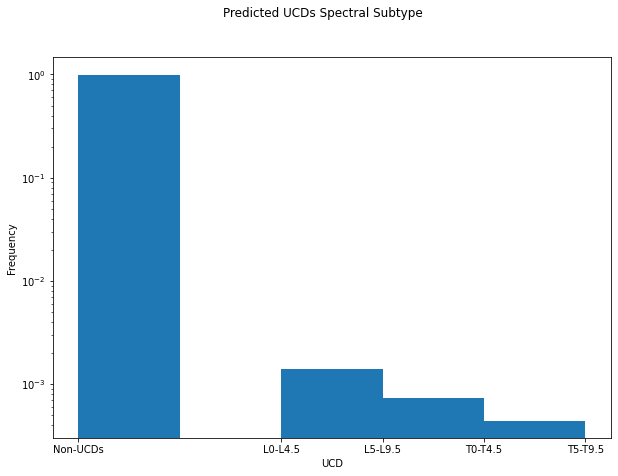

In [47]:
import math
fig, ax = plt.subplots(figsize =(10, 7))
w = 1
n = math.ceil((UCD_nonUCD.max() - UCD_nonUCD.min())/w)
ax.hist(UCD_nonUCD, bins = n ,density = True)
plt.xticks([0, 2, 3, 4, 5], ['Non-UCDs', 'L0-L4.5', 'L5-L9.5', 'T0-T4.5','T5-T9.5'],rotation=0)
ax.set(xlabel='UCD', ylabel='Frequency') 
#plt.xlim(-2,6)
plt.yscale("log")
plt.suptitle("Predicted UCDs Spectral Subtype")
plt.savefig("C:/pythonplot/plot/Predicted UCDs Spectral Subtype - 2 radius.pdf",bbox_inches="tight",pad_inches=2,transparent=True)
plt.show()



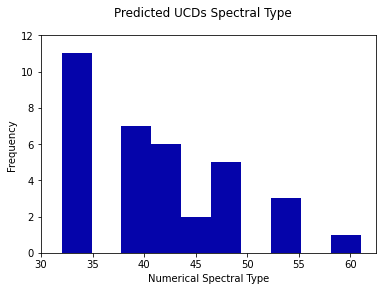

In [48]:
fig, ax=plt.subplots() 
binedges=ax.hist(SpecTypeN, color='#0504aa') 
ax.set(xlabel='Numerical Spectral Type', ylabel='Frequency') 
plt.xlim(xmin=30)
plt.ylim(ymax=12)
plt.suptitle("Predicted UCDs Spectral Type")
plt.savefig("C:/pythonplot/plot/Predicted UCDs Spectral Type - 2 radius.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

In [49]:
from astropy.table import QTable, Table, Column
t = Table([Number_UCD, Subtype_Grouping, Spectral_Type], names=('a', 'b', 'c'))
t

a,b,c
int64,int64,float64
1,2,33.65
1,2,31.895
1,2,39.215
1,2,31.955
1,2,33.71
1,2,34.435
1,2,39.34
1,3,37.77
1,2,31.85


In [50]:
Non_UCD
#Non_UCD.to_csv('UCDS.csv',index=False)

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,...,J-H unc,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc
28,2,3,J095851.52+051348.9,,NaN,22.374001,0.455,23.103001,0.292,22.125000,...,0.099639,0.103479,0.106832,0.173519,0.092022,0.095776,0.166940,0.099765,0.169260,0.171330
261,2,3,J095854.98+050106.3,,NaN,23.825001,1.235,21.632999,0.104,21.181999,...,0.171327,0.157762,0.156311,0.315087,0.175824,0.174522,0.324507,0.161227,0.317555,0.316836
262,2,6,J095854.99+045906.6,,NaN,23.833000,0.875,22.900999,0.206,22.473000,...,0.165469,0.162641,0.134462,0.197626,0.164073,0.136191,0.198806,0.132740,0.196459,0.173851
263,1,3,J095854.99+050106.6,,NaN,22.301001,0.435,21.764999,0.112,21.275000,...,0.171327,0.157762,0.156311,0.315087,0.175824,0.174522,0.324507,0.161227,0.317555,0.316836
264,1,3,J095854.99+045906.3,,NaN,23.002001,0.570,22.985001,0.243,22.327999,...,0.165469,0.162641,0.134462,0.197626,0.164073,0.136191,0.198806,0.132740,0.196459,0.173851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428844,1,3,J100605.21+034539.2,,NaN,22.804001,0.681,22.421000,0.215,20.716000,...,0.099905,0.076662,0.077698,0.122332,0.084534,0.085475,0.127413,0.056586,0.110136,0.110860
428845,2,3,J100605.21+034538.9,,NaN,NaN,NaN,22.614000,0.234,20.785000,...,0.099905,0.076662,0.077698,0.122332,0.084534,0.085475,0.127413,0.056586,0.110136,0.110860
428956,1,3,J100614.08+034708.0,,NaN,12.796000,0.002,10.331000,0.001,12.942000,...,0.001000,0.001000,0.033000,0.019000,0.001414,0.033015,0.019026,0.033015,0.019026,0.038079
428965,1,3,J100614.64+034559.9,,NaN,23.733000,1.182,21.356001,0.073,19.886999,...,0.067209,0.052839,0.065765,0.099298,0.055471,0.067897,0.100722,0.053712,0.091761,0.099765


In [51]:
for cat in ['SIMBAD']:
    Non_UCD = spdb.queryXMatch(Non_UCD,catalog=cat,radius=15.*u.arcsec)
Non_UCD

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,...,SIMBAD_V,SIMBAD_R,SIMBAD_J,SIMBAD_H,SIMBAD_K,SIMBAD_u,SIMBAD_g,SIMBAD_r,SIMBAD_i,SIMBAD_z
0,2,3,J095851.52+051348.9,,NaN,22.374001,0.455,23.103001,0.292,22.125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,J095854.98+050106.3,,NaN,23.825001,1.235,21.632999,0.104,21.181999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6,J095854.99+045906.6,,NaN,23.833000,0.875,22.900999,0.206,22.473000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,J095854.99+050106.6,,NaN,22.301001,0.435,21.764999,0.112,21.275000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3,J095854.99+045906.3,,NaN,23.002001,0.570,22.985001,0.243,22.327999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13478,1,3,J100605.21+034539.2,,NaN,22.804001,0.681,22.421000,0.215,20.716000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13479,2,3,J100605.21+034538.9,,NaN,NaN,NaN,22.614000,0.234,20.785000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13480,1,3,J100614.08+034708.0,,NaN,12.796000,0.002,10.331000,0.001,12.942000,...,9.97,NaN,8.159,7.649,7.562,NaN,NaN,NaN,NaN,NaN
13481,1,3,J100614.64+034559.9,,NaN,23.733000,1.182,21.356001,0.073,19.886999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
Non_UCD['UCD_nonUCD'] = UCD
Non_UCD
#Non_UCD.to_csv('UCDS.csv',index=False)

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,...,SIMBAD_R,SIMBAD_J,SIMBAD_H,SIMBAD_K,SIMBAD_u,SIMBAD_g,SIMBAD_r,SIMBAD_i,SIMBAD_z,UCD_nonUCD
0,2,3,J095851.52+051348.9,,NaN,22.374001,0.455,23.103001,0.292,22.125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,3,J095854.98+050106.3,,NaN,23.825001,1.235,21.632999,0.104,21.181999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,6,J095854.99+045906.6,,NaN,23.833000,0.875,22.900999,0.206,22.473000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1,3,J095854.99+050106.6,,NaN,22.301001,0.435,21.764999,0.112,21.275000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1,3,J095854.99+045906.3,,NaN,23.002001,0.570,22.985001,0.243,22.327999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13478,1,3,J100605.21+034539.2,,NaN,22.804001,0.681,22.421000,0.215,20.716000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13479,2,3,J100605.21+034538.9,,NaN,NaN,NaN,22.614000,0.234,20.785000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13480,1,3,J100614.08+034708.0,,NaN,12.796000,0.002,10.331000,0.001,12.942000,...,NaN,8.159,7.649,7.562,NaN,NaN,NaN,NaN,NaN,0
13481,1,3,J100614.64+034559.9,,NaN,23.733000,1.182,21.356001,0.073,19.886999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [53]:
Non_UCD[Non_UCD['UCD_nonUCD']==1]

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,...,SIMBAD_R,SIMBAD_J,SIMBAD_H,SIMBAD_K,SIMBAD_u,SIMBAD_g,SIMBAD_r,SIMBAD_i,SIMBAD_z,UCD_nonUCD
69,2,3,J095956.97+051014.3,,NaN,24.896000,1.332,25.021999,0.775,25.375999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1188,2,6,J100221.10+050202.3,,NaN,24.990999,0.813,24.292000,0.561,24.254999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1843,1,6,J100019.49+053252.9,,NaN,25.662001,0.890,24.915001,0.576,23.959999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1878,1,6,J100101.49+054724.7,,NaN,24.458000,0.798,25.733000,0.428,24.313999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3263,1,6,J095812.42+042139.4,,NaN,25.334000,1.073,25.746000,0.561,24.950001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3453,1,3,J100330.00+041344.9,,NaN,24.311001,1.184,26.233999,0.457,24.268000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3824,1,6,J095651.79+055452.5,,NaN,24.891001,1.081,24.971001,0.595,23.902000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4724,1,3,J095443.17+045613.1,,NaN,26.267000,0.545,26.311001,0.447,25.364000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4869,1,3,J095551.06+045406.2,,NaN,22.987000,0.484,24.711000,0.599,24.355000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6109,1,6,J100425.81+042806.8,,NaN,25.459000,0.781,25.153000,0.592,24.621000,...,NaN,17.400,16.470,15.720,NaN,NaN,NaN,21.700,19.43,1


In [54]:
UCDs = Non_UCD[Non_UCD['UCD_nonUCD']==1]

In [77]:
UCDs["SIMBAD_sp_type"]

69         NaN
1188       NaN
1843       NaN
1878       NaN
3263       NaN
3453       NaN
3824       NaN
4724       NaN
4869       NaN
6109       NaN
6232       NaN
6410       NaN
7683       NaN
7922       NaN
8166        L1
8353       NaN
8823       NaN
9079        T5
9353       NaN
9478       NaN
9479       NaN
9661       NaN
10786    M9.5V
11029      NaN
11160      NaN
11171      NaN
11302      NaN
11646      NaN
11684      NaN
11708      NaN
11865      NaN
11938      NaN
12163      NaN
13256      NaN
13347      NaN
Name: SIMBAD_sp_type, dtype: object

In [78]:
UCDs["SpTSub"] = Subtype_Grouping

In [87]:
UCDs["SpTnum"] = Spectral_Type

In [88]:
UCDs["SpTSub"]

69       2
1188     2
1843     2
1878     2
3263     2
3453     2
3824     2
4724     3
4869     2
6109     2
6232     2
6410     2
7683     4
7922     3
8166     2
8353     2
8823     4
9079     5
9353     2
9478     2
9479     2
9661     4
10786    2
11029    3
11160    4
11171    3
11302    2
11646    3
11684    3
11708    4
11865    3
11938    3
12163    2
13256    3
13347    3
Name: SpTSub, dtype: int64

In [93]:
UCDs

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,...,SIMBAD_H,SIMBAD_K,SIMBAD_u,SIMBAD_g,SIMBAD_r,SIMBAD_i,SIMBAD_z,UCD_nonUCD,SpTSub,SpTnum
69,2,3,J095956.97+051014.3,,NaN,24.896000,1.332,25.021999,0.775,25.375999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,33.650
1188,2,6,J100221.10+050202.3,,NaN,24.990999,0.813,24.292000,0.561,24.254999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,31.895
1843,1,6,J100019.49+053252.9,,NaN,25.662001,0.890,24.915001,0.576,23.959999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,39.215
1878,1,6,J100101.49+054724.7,,NaN,24.458000,0.798,25.733000,0.428,24.313999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,31.955
3263,1,6,J095812.42+042139.4,,NaN,25.334000,1.073,25.746000,0.561,24.950001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,33.710
3453,1,3,J100330.00+041344.9,,NaN,24.311001,1.184,26.233999,0.457,24.268000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,34.435
3824,1,6,J095651.79+055452.5,,NaN,24.891001,1.081,24.971001,0.595,23.902000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,39.340
4724,1,3,J095443.17+045613.1,,NaN,26.267000,0.545,26.311001,0.447,25.364000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,37.770
4869,1,3,J095551.06+045406.2,,NaN,22.987000,0.484,24.711000,0.599,24.355000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,31.850
6109,1,6,J100425.81+042806.8,,NaN,25.459000,0.781,25.153000,0.592,24.621000,...,16.470,15.720,NaN,NaN,NaN,21.700,19.43,1,2,38.200


In [94]:
UCDs.to_csv('Completed table of UCDs discovered with 2 radius ra=150 dec=5.csv',index=False)

In [89]:
list(UCDs.columns)

['mode',
 'cl',
 'SDSS',
 'm_SDSS',
 'zsp',
 'umag',
 'e_umag',
 'gmag',
 'e_gmag',
 'rmag',
 'e_rmag',
 'imag',
 'e_imag',
 'zmag',
 'e_zmag',
 'RA',
 'DEC',
 'ObsDate',
 'Q',
 'DESIGNATION',
 'COORDINATES',
 'UKIDSS_angDist',
 'UKIDSS_JName',
 'UKIDSS_ra',
 'UKIDSS_dec',
 'UKIDSS_yAperMag3',
 'UKIDSS_j_1AperMag3',
 'UKIDSS_hAperMag3',
 'UKIDSS_kAperMag3',
 'UKIDSS_yAperMag3Err',
 'UKIDSS_j_1AperMag3Err',
 'UKIDSS_hAperMag3Err',
 'UKIDSS_kAperMag3Err',
 'UKIDSS_sourceID',
 'UKIDSS_mode',
 'UKIDSS_epoch',
 'UKIDSS_mergedClass',
 'ALLWISE_angDist',
 'ALLWISE_AllWISE',
 'ALLWISE_RAJ2000',
 'ALLWISE_DEJ2000',
 'ALLWISE_eeMaj',
 'ALLWISE_eeMin',
 'ALLWISE_eePA',
 'ALLWISE_W1mag',
 'ALLWISE_W2mag',
 'ALLWISE_W3mag',
 'ALLWISE_W4mag',
 'ALLWISE_Jmag',
 'ALLWISE_Hmag',
 'ALLWISE_Kmag',
 'ALLWISE_e_W1mag',
 'ALLWISE_e_W2mag',
 'ALLWISE_e_W3mag',
 'ALLWISE_e_W4mag',
 'ALLWISE_e_Jmag',
 'ALLWISE_e_Hmag',
 'ALLWISE_e_Kmag',
 'ALLWISE_ID',
 'ALLWISE_ccf',
 'ALLWISE_ex',
 'ALLWISE_var',
 'ALLWISE_q

In [90]:
UCDs[["SpTSub", "SIMBAD_sp_type","SpTnum"]]

,SpTSub,SIMBAD_sp_type,SpTnum
69,2,NaN,33.650
1188,2,NaN,31.895
1843,2,NaN,39.215
1878,2,NaN,31.955
3263,2,NaN,33.710
3453,2,NaN,34.435
3824,2,NaN,39.340
4724,3,NaN,37.770
4869,2,NaN,31.850
6109,2,NaN,38.200


In [91]:
UCDs[['SDSS',"SIMBAD_sp_type",'SIMBAD_main_id','SpTSub', 'SpTnum','SIMBAD_ra', 'SIMBAD_dec']]

,SDSS,SIMBAD_sp_type,SIMBAD_main_id,SpTSub,SpTnum,SIMBAD_ra,SIMBAD_dec
69,J095956.97+051014.3,NaN,NaN,2,33.650,NaN,NaN
1188,J100221.10+050202.3,NaN,NaN,2,31.895,NaN,NaN
1843,J100019.49+053252.9,NaN,NaN,2,39.215,NaN,NaN
1878,J100101.49+054724.7,NaN,NaN,2,31.955,NaN,NaN
3263,J095812.42+042139.4,NaN,NaN,2,33.710,NaN,NaN
3453,J100330.00+041344.9,NaN,NaN,2,34.435,NaN,NaN
3824,J095651.79+055452.5,NaN,NaN,2,39.340,NaN,NaN
4724,J095443.17+045613.1,NaN,NaN,3,37.770,NaN,NaN
4869,J095551.06+045406.2,NaN,NaN,2,31.850,NaN,NaN
6109,J100425.81+042806.8,NaN,ULAS J100425.76+042806.7,2,38.200,151.107333,4.468528


In [98]:
UCDsSimbad = UCDs[['SDSS','UCD_nonUCD',
 'SpTSub',
 'SpTnum','DESIGNATION','SIMBAD_sp_type','SIMBAD_angDist', 'UKIDSS_ra',
 'UKIDSS_dec',
 'SIMBAD_main_id',
 'SIMBAD_ra',
 'SIMBAD_dec',
 'SIMBAD_coo_err_maj',
 'SIMBAD_coo_err_min',
 'SIMBAD_coo_err_angle',
 'SIMBAD_nbref',
 'SIMBAD_ra_sexa',
 'SIMBAD_dec_sexa',
 'SIMBAD_main_type',
 'SIMBAD_other_types',
 'SIMBAD_radvel',
 'SIMBAD_redshift','SIMBAD_morph_type',
 'SIMBAD_plx',
 'SIMBAD_pmra',
 'SIMBAD_pmdec',
 'SIMBAD_size_maj',
 'SIMBAD_size_min',
 'SIMBAD_size_angle']]

In [99]:
UCDsSimbad

,SDSS,UCD_nonUCD,SpTSub,SpTnum,DESIGNATION,SIMBAD_sp_type,SIMBAD_angDist,UKIDSS_ra,UKIDSS_dec,SIMBAD_main_id,...,SIMBAD_other_types,SIMBAD_radvel,SIMBAD_redshift,SIMBAD_morph_type,SIMBAD_plx,SIMBAD_pmra,SIMBAD_pmdec,SIMBAD_size_maj,SIMBAD_size_min,SIMBAD_size_angle
69,J095956.97+051014.3,1,2,33.650,J09595697+0510143,NaN,NaN,149.987248,5.170627,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
1188,J100221.10+050202.3,1,2,31.895,J10022111+0502023,NaN,NaN,150.587959,5.033985,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
1843,J100019.49+053252.9,1,2,39.215,J10001949+0532529,NaN,NaN,150.081188,5.548033,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
1878,J100101.49+054724.7,1,2,31.955,J10010149+0547248,NaN,NaN,150.256100,5.790246,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
3263,J095812.42+042139.4,1,2,33.710,J09581242+0421395,NaN,NaN,149.551806,4.360767,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
3453,J100330.00+041344.9,1,2,34.435,J10033001+0413450,NaN,NaN,150.874930,4.229233,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
3824,J095651.79+055452.5,1,2,39.340,J09565179+0554526,NaN,NaN,149.215779,5.914566,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4724,J095443.17+045613.1,1,3,37.770,J09544317+0456131,NaN,NaN,148.682605,4.935616,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4869,J095551.06+045406.2,1,2,31.850,J09555106+0454063,NaN,NaN,148.962704,4.901751,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
6109,J100425.81+042806.8,1,2,38.200,J10042582+0428068,NaN,0.883678,151.107371,4.468545,ULAS J100425.76+042806.7,...,NIR|BD?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


In [100]:
UCDsSimbad.to_csv('Resumed table of UCDs discovered with 2 radius ra=150 dec=5.csv',index=False)